In [30]:
import pandas as pd
import seaborn as sns

In [14]:
def read_csv(path,nrows=None):
    """Reads dataset"""
    df = pd.read_csv(path,nrows=nrows)
    df["click time"] = pd.to_datetime(df["click_time"])
    df.set_index("click_time",inplace=True)
    df.sort_index(inplace=True)
    
    return df

In [15]:
#Training data set
dataset_train = read_csv("data/train_sample.csv")

# Benchmark
dataset_test = read_csv("data/train.csv", nrows = 10000)


Data Exploration

In [16]:
dataset_train.describe()

,ip,app,device,os,channel,is_attributed
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,0.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,1.000000


In [25]:
df = dataset_train.nunique()
pd.DataFrame({"atribute": df.index,"unique_values": df.values})


,atribute,unique_values
0,ip,34857
1,app,161
2,device,100
3,os,130
4,channel,161
5,attributed_time,227
6,is_attributed,2
7,click time,80350


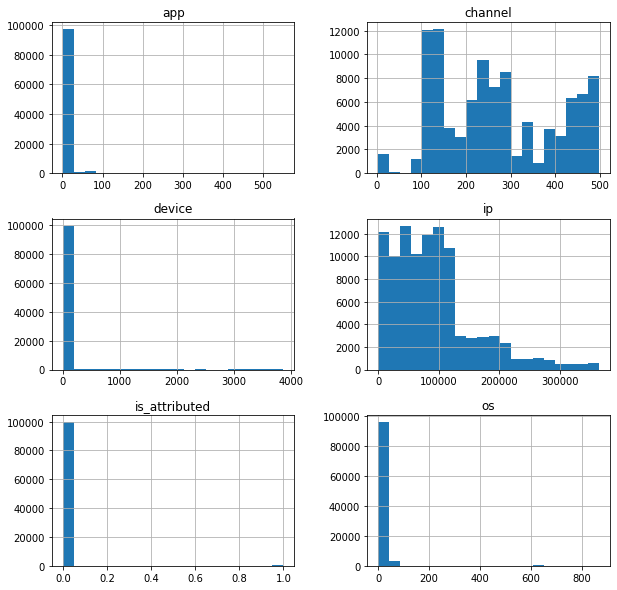

In [27]:
dataset_train.hist(bins=20, figsize=(10,10));

In [34]:
corr = dataset_train.corr()
corr.style.background_gradient()


,ip,app,device,os,channel,is_attributed
ip,1.000000,0.010400,-0.001499,-0.000470,0.007563,0.054955
app,0.010400,1.000000,0.248376,0.247160,-0.028238,0.064426
device,-0.001499,0.248376,1.000000,0.924456,-0.035398,-0.000695
os,-0.000470,0.247160,0.924456,1.000000,-0.033175,0.006183
channel,0.007563,-0.028238,-0.035398,-0.033175,1.000000,-0.023336
is_attributed,0.054955,0.064426,-0.000695,0.006183,-0.023336,1.000000


In [35]:
dataset_train.sns.heatmap()

AttributeError: 'DataFrame' object has no attribute 'sns'

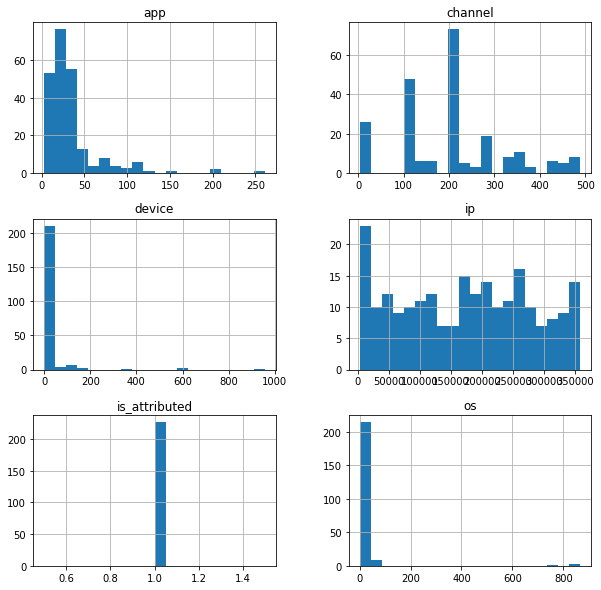

In [40]:
dataset_train[(dataset_train["is_attributed"]==1)].hist(bins = 20,figsize =(10,10));

In [59]:
top_apps = dataset_train.groupby(["app"])["is_attributed"].agg(is_attributed="sum")
top_apps.sort_values("is_attributed",ascending= False).head(10)

,is_attributed
app,
19,70
35,27
29,22
10,18
5,14
45,11
9,8
72,6
18,5


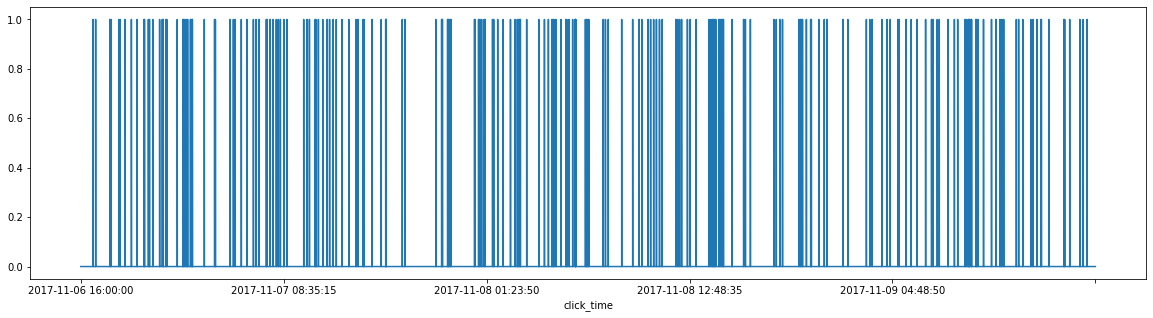

In [64]:
dataset_train.apply(lambda x: 1 if x["is_attributed"] == 1 else 0,axis=1).plot(figsize=(20,5));